In [1]:
import os
import sys
import cv2
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm_notebook

In [2]:
data = pd.read_csv('weather_image_recognition/color_histogram.csv', index_col='image_id')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,file_path
image_id,,,,,,,,,,,,,,,,,,,,,
000000_,1.000000e+00,8.741844e-02,7.034527e-01,0.011057,0.052840,0.601915,0.003207,0.083466,0.649100,0.002313,...,0.000013,1.406734e-03,-1.437002e-10,0.000104,5.275069e-11,0.001708,0.001584,0.028443,0.021604,C:\Users\Asus\Desktop\Project\ImageRecommender...
000001_,-1.455192e-11,-1.637090e-11,-1.045919e-11,0.002393,0.005573,0.001429,0.007051,0.017359,0.005110,0.021533,...,0.389849,6.174161e-01,4.125379e-01,0.542714,8.710924e-01,0.555396,1.000000,1.000000,1.000000,C:\Users\Asus\Desktop\Project\ImageRecommender...
000002_,1.448514e-01,6.331907e-04,1.521892e-02,0.830019,0.188652,0.400394,1.000000,0.317324,1.000000,0.488636,...,0.000000,3.637979e-12,1.830213e-04,0.000039,3.637979e-12,0.000070,0.000039,0.000134,0.000000,C:\Users\Asus\Desktop\Project\ImageRecommender...
000003_,0.000000e+00,6.572029e-05,0.000000e+00,0.004035,0.008215,0.003885,0.026543,0.050210,0.028661,0.162033,...,0.007377,2.563091e-03,4.267244e-03,0.002207,1.182965e-03,0.001465,0.001135,0.000000,0.000764,C:\Users\Asus\Desktop\Project\ImageRecommender...
000004_,1.967518e-03,0.000000e+00,0.000000e+00,0.002468,0.000000,0.000074,0.002504,0.000000,0.000628,0.007691,...,0.004865,1.007302e-02,1.403405e-03,0.003470,4.596427e-03,0.001108,0.000000,0.002347,0.000222,C:\Users\Asus\Desktop\Project\ImageRecommender...


In [3]:
# We just want the file_path from the csv file. This is alternative before we have a db for the file_path
data[['file_path']].head()

,file_path
image_id,
000000_,C:\Users\Asus\Desktop\Project\ImageRecommender...
000001_,C:\Users\Asus\Desktop\Project\ImageRecommender...
000002_,C:\Users\Asus\Desktop\Project\ImageRecommender...
000003_,C:\Users\Asus\Desktop\Project\ImageRecommender...
000004_,C:\Users\Asus\Desktop\Project\ImageRecommender...


In [47]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

x = base_model.output
embeddings = layers.GlobalAveragePooling2D()(x) # layer before output

model = Model(base_model.input, embeddings)

In [48]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

                                                                                                  
 conv2_block2_add (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, None, None,   0           ['conv2_block2_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, None, None,   16448       ['conv2_block2_out[0][0]']       
                                64)                                                               
                                                                                                  
 conv2_blo

                                128)                                                              
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_2_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, None, None,   0          ['conv3_block2_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block2_2_relu[0][0]']    
                                512)                                                              
          

 conv4_block1_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, None, None,   0          ['conv4_block1_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block1_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_2_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block3_add (Add)         (None, None, None,   0           ['conv4_block2_out[0][0]',       
                                1024)                             'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_block3_out (Activation)  (None, None, None,   0           ['conv4_block3_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_blo

 ization)                       256)                                                              
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, None, None,   0          ['conv4_block6_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block6_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       1024)                                                             
          

 conv5_block3_1_conv (Conv2D)   (None, None, None,   1049088     ['conv5_block2_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, None, None,   2048       ['conv5_block3_1_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             512)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   2359808     ['conv5_block3_1_relu[0][0]']    
          

### strategy for include batch size during training

In [22]:
os.getcwd()

'C:\\Users\\Asus\\Desktop\\Project\\ImageRecommender'

In [71]:
image_paths = data['file_path'].tolist()

In [73]:
len(image_paths)

31932

In [82]:
# Initialize a list to store the embeddings
filenames = []
embeddings = []

# Process images in batches
batch_size = 100
num_images = len(image_paths)
num_batches = num_images // batch_size

for batch in tqdm_notebook(range(num_batches), desc='get embeddings'):
    start_idx = batch * batch_size
    end_idx = (batch + 1) * batch_size

    batch_images = []

    # Process images in the current batch
    for image_path in image_paths[start_idx:end_idx]:
        filename = os.path.basename(image_path).replace(".jpg", "").replace(".png", "") # extract the filename
        filenames.append(filename)
        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        batch_images.append(x)

    # Concatenate images in the batch
    batch_images = np.concatenate(batch_images, axis=0)

    # Extract the embeddings for the batch
    batch_embeddings = model.predict(batch_images)
    batch_embeddings = batch_embeddings.reshape(batch_embeddings.shape[0], -1)

    # Append the embeddings to the list
    embeddings.append(batch_embeddings)

# Concatenate embeddings from all batches
embeddings = np.concatenate(embeddings, axis=0)

# Print the shape of the embeddings array
print(embeddings.shape)

get embeddings:   0%|          | 0/319 [00:00<?, ?it/s]

4/4 [==============================] - 8s 2s/step


4/4 [==============================] - 8s 2s/step
(31900, 2048)


In [231]:
os.getcwd()

'C:\\Users\\Asus\\Desktop\\Project\\ImageRecommender\\weather_image_recognition'

In [83]:
embeddings = np.array(embeddings)
df = pd.DataFrame(embeddings)
df['id'] = filenames
df['id'].replace(' ', '')
df = df.set_index('id')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
id,,,,,,,,,,,,,,,,,,,,,
000000_,6.862374,0.699451,0.427140,0.006834,0.104121,0.309327,0.075689,0.686164,0.036264,0.000000,...,0.058936,0.000000,0.979317,0.000000,0.029853,0.018639,0.030241,0.232394,0.310612,1.470915
000001_,0.244853,2.544216,0.000000,0.298929,1.176665,0.056427,0.006840,0.000000,0.000000,1.546012,...,0.118142,0.429420,0.552497,0.000000,0.000000,0.012463,0.000000,0.000000,0.127913,0.368000
000002_,5.671950,0.085187,0.852656,0.327039,0.000000,0.000000,0.000580,0.000000,0.371360,0.000000,...,0.000000,0.002479,0.000000,0.132498,0.251379,0.000000,0.295880,0.098552,0.108324,1.189066
000003_,2.670874,0.000000,0.000000,0.000000,0.000000,0.000000,0.062148,0.000000,0.010454,0.371723,...,0.000000,0.068883,0.213882,0.000000,0.000000,0.000000,0.000000,0.007898,0.005712,0.000000
000004_,4.802979,0.000000,0.764017,0.162811,0.000000,0.000000,0.030078,0.005119,0.000000,0.004073,...,0.014523,0.000000,0.017444,0.041316,0.000000,0.028519,0.059754,2.096421,0.039790,1.758875


In [84]:
df.shape # lost last 32 images, because not enough in one batch. !BUGS

(31900, 2048)

In [254]:
df.to_csv('embeddings.csv')

### measure similarity

In [4]:
os.getcwd()

'C:\\Users\\Asus\\Desktop\\Project\\ImageRecommender'

In [9]:
df = pd.read_csv('weather_image_recognition/embeddings.csv', index_col='id')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
id,,,,,,,,,,,,,,,,,,,,,
000000_,6.862374,0.699451,0.427140,0.006834,0.104121,0.309327,0.075689,0.686164,0.036264,0.000000,...,0.058936,0.000000,0.979317,0.000000,0.029853,0.018639,0.030241,0.232394,0.310612,1.470915
000001_,0.244853,2.544216,0.000000,0.298929,1.176665,0.056427,0.006840,0.000000,0.000000,1.546012,...,0.118142,0.429420,0.552497,0.000000,0.000000,0.012463,0.000000,0.000000,0.127913,0.368000
000002_,5.671950,0.085187,0.852656,0.327039,0.000000,0.000000,0.000580,0.000000,0.371360,0.000000,...,0.000000,0.002479,0.000000,0.132498,0.251379,0.000000,0.295880,0.098552,0.108324,1.189066
000003_,2.670874,0.000000,0.000000,0.000000,0.000000,0.000000,0.062148,0.000000,0.010454,0.371723,...,0.000000,0.068883,0.213882,0.000000,0.000000,0.000000,0.000000,0.007898,0.005712,0.000000
000004_,4.802979,0.000000,0.764017,0.162811,0.000000,0.000000,0.030078,0.005119,0.000000,0.004073,...,0.014523,0.000000,0.017444,0.041316,0.000000,0.028519,0.059754,2.096421,0.039790,1.758875


In [12]:
from sklearn.metrics.pairwise import cosine_similarity

arr_cos = np.array([])

for i in range(len(df)):
    v1 = np.array(df.iloc[0, :].values).reshape(1, -1)
    v2 = np.array(df.iloc[i, :].values).reshape(1, -1)
    arr_cos = np.append(arr_cos, cosine_similarity(v1, v2))

sorted_indices_cos = np.argsort(arr_cos)
print(sorted_indices_cos[-6:])

[310 466 129  42 611   0]


In [85]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance

arr_euc = np.array([])
for i in range(len(df)):
    v1 = np.array(df.iloc[0, :])
    v2 = np.array(df.iloc[i, :])
    arr_euc = np.append(arr_euc, distance.euclidean(v1, v2))

sorted_indices_euc = np.argsort(arr_euc)
print(sorted_indices_euc[:6])

[  0 611  42 270  90  60]


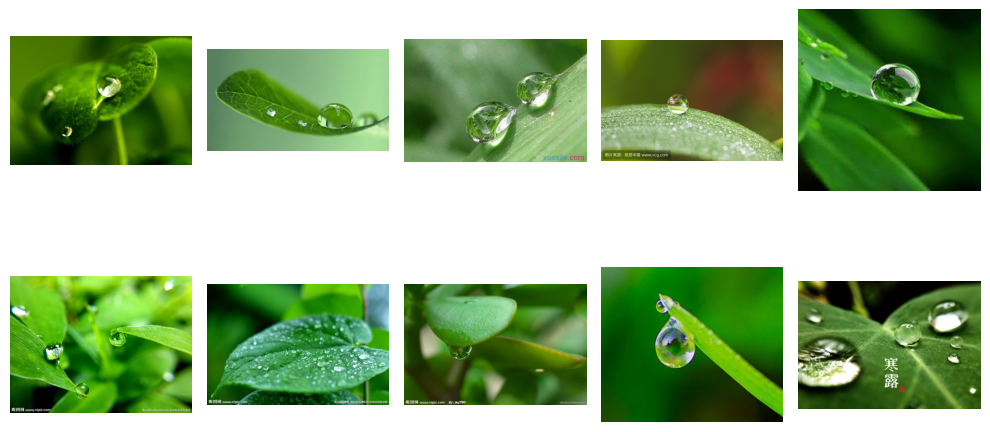

In [86]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

top_5_euc = sorted_indices_euc[:10]
#bottom_5_cos = sorted_indices_cos[-10:]
def plot_images(file_paths):
    num_images = len(file_paths)
    num_rows = 2
    num_cols = (num_images + 1) // 2  # Calculate the number of columns based on the number of images

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))

    for i, ax in enumerate(axes.flat):
        if i < num_images:
            try:
                img = mpimg.imread(file_paths[i])
                ax.imshow(img)
                ax.axis('off')
            except IOError:
                print(f"Unable to open image file: {file_paths[i]}")
        else:
            ax.axis('off')  # Hide unused subplot

    plt.tight_layout()
    plt.show()

# Usage example
file_paths = []
for i in top_5_euc:
#for i in bottom_5_cos:
    idx = f"{i:06}_"
    img_path = data.loc[idx]["file_path"]
    file_paths.append(img_path)
    
#file_paths = sorted_indices_euc
plot_images(file_paths)

# draft area

In [53]:
# Counter for unique image names
image_counter = 0

# creating the generator
def reader(filepath, rename=False):
    '''
    This function generates through all the images file in the folder
    ''' 
    current_path = filepath 
    print(current_path)
    
    global image_counter  
    
    for foldername in os.listdir(current_path):
        folderpath = os.path.join(filepath, foldername)
        current_path = folderpath
        
        if os.path.isdir(folderpath) and not foldername.startswith('.'):
            os.chdir(folderpath)
            print(folderpath)
            
            for file in os.listdir(folderpath):
                if file.endswith(".jpg") or file.endswith(".png"): 
                    with open(os.path.join(folderpath, file), "rb") as f:
                        image = f.read()
                        img = cv2.imread(file)
                    
                    # check if image can be loaded correctly
                    if img is not None:   
                        # yield tuple, so later we need to use
                        yield (img, os.path.join(folderpath, file))
                        
                    else:
                        # check path or image format
                        print(f"Error while loading image: {file}")
            
            os.chdir('..')

In [153]:
filepath = os.path.join(os.getcwd(), "test")
gen = reader(filepath)

In [160]:
# Define the path to the original image
image_path = os.path.join(filepath, 't1/1_.jpg')

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Extract the image embedding
embedding = model.predict(x)

# Flatten the embedding to a 1D array
embedding = embedding.flatten()

# Print the shape of the embedding
print(embedding.shape)

1/1 [==============================] - 0s 499ms/step
(2048,)


In [158]:
embedding

array([[7.4940963 , 0.1771382 , 0.11501522, ..., 0.4280081 , 0.80446166,
        1.7910606 ]], dtype=float32)

In [161]:
#import glob

# Define the path to the directory containing the images
#image_directory = 'path/to/images/'

# Get a list of image file paths
#image_paths = glob.glob(image_directory + '*.jpg')
filepath = os.path.join(os.getcwd(), "weather_image_recognition")
gen = reader(filepath)


# Initialize a list to store the embeddings
filenames = []
embeddings = []

# Process each image
for img, image_path in tqdm_notebook(gen, desc='get embeddings'):
    # Get the filename
    file_name = os.path.basename(image_path).replace(".jpg", "").replace(".png", "") # extract the filename
    
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) # add extra dimension (1) for batch size
    x = preprocess_input(x)

    # Extract the image embedding
    embedding = model.predict(x)

    # Flatten the embedding to a 1D array
    embedding = embedding.flatten()

    # Append the embedding to the list
    embeddings.append(embedding)
    
    # Append the filename
    filenames.append(file_name)

# Convert the list of embeddings to a NumPy array
embeddings = np.array(embeddings)

# Print the shape of the embeddings array
print(embeddings.shape)


get embeddings: 0it [00:00, ?it/s]

C:\Users\Asus\Desktop\Project\ImageRecommender\weather_image_recognition
C:\Users\Asus\Desktop\Project\ImageRecommender\weather_image_recognition\dew
1/1 [==============================] - 1s 516ms/step


1/1 [==============================] - 1s 521ms/step


1/1 [==============================] - 1s 564ms/step
C:\Users\Asus\Desktop\Project\ImageRecommender\weather_image_recognition\fogsmog
1/1 [==============================] - 1s 533ms/step


1/1 [==============================] - 1s 674ms/step


KeyboardInterrupt: 

In [226]:
embeddings = np.array(embeddings)
df = pd.DataFrame(embeddings)
df['id'] = filenames
df['id'].replace(' ', '')
df = df.set_index('id')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
id,,,,,,,,,,,,,,,,,,,,,
000000_,6.862374,0.699451,0.427140,0.006834,0.104121,0.309327,0.075689,0.686164,0.036264,0.000000,...,0.058936,0.000000,0.979317,0.000000,0.029853,0.018639,0.030241,0.232394,0.310612,1.470915
000001_,0.244853,2.544216,0.000000,0.298929,1.176665,0.056427,0.006840,0.000000,0.000000,1.546012,...,0.118142,0.429420,0.552497,0.000000,0.000000,0.012463,0.000000,0.000000,0.127913,0.368000
000002_,5.671950,0.085187,0.852656,0.327039,0.000000,0.000000,0.000580,0.000000,0.371360,0.000000,...,0.000000,0.002479,0.000000,0.132498,0.251379,0.000000,0.295880,0.098552,0.108324,1.189066
000003_,2.670874,0.000000,0.000000,0.000000,0.000000,0.000000,0.062148,0.000000,0.010454,0.371723,...,0.000000,0.068883,0.213882,0.000000,0.000000,0.000000,0.000000,0.007898,0.005712,0.000000
000004_,4.802979,0.000000,0.764017,0.162811,0.000000,0.000000,0.030078,0.005119,0.000000,0.004073,...,0.014523,0.000000,0.017444,0.041316,0.000000,0.028519,0.059754,2.096421,0.039790,1.758875
